<img src="http://drive.google.com/uc?export=view&id=1tpOCamr9aWz817atPnyXus8w5gJ3mIts" width=500px>

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# Mobile Phone Review Analysis

## Context

The product companies can utilize the detailed review comments to gather insights from the end user. Most of the products are sold via e-commerce sites like Flipkart or Amazon where customers can buy a product and give their review about the product on the web site. 
Product managers can identify the relevant reviews from the website and run a sentiment analysis tool to understand what the sentiments of the customer are. Based on their sentiments, they can identify what users think of the current product. Are they happy? Discontent? 
They can also come up with a document that lists the features, the team needs to focus on for making the product better. 

## Objective

Given the review data rating label, we will try to get insights about various brands and their ratings using text analytics and build a model to predict the rating and overall sentiment. 


### Package version

- tensorflow==2.3.0
- scikit-learn==0.22.2.post1
- pandas==1.0.5
- numpy==1.18.5
- matplotlib==3.2.2
- google==2.0.3

### Data Dictionary 

product_data.csv - contains product details
- 'asin',  - Product ASIN
- 'brand', - Product Brand
- 'title', - Product Title
- 'url',  - Product URL
- 'image', - Product Image URL
- 'rating',- Product Avg. Rating
- 'reviewUrl' - Product Review Page URL
- 'totalReviews' - Product Total Reviews
- ‘price’ - Product Price ($)
- ‘originalPrice’ - Product Original Price ($)
 
reviews.csv  - contains user review details
 
- 'asin' - Product ASIN
- 'name' - Reviewer Name
- 'rating' - Reviewer Rating (scale 1 to 5)
- 'date'  - Review Date
- 'verified' - Valid Customer
- 'title'  - Review Title
- 'body'  - Review Content
- 'helpfulVotes  - Helpful Feedbacks


## Table of Content

1. Import Libraries

2. Setting options

3. Read Data

4. Data Analysis and EDA

5. Text preprocessing and Vectorization

6. Model building

7. Conclusion and Interpretation

## 1. Import Libraries

Let us start by mounting the drive

from google.colab import drive
drive.mount('/content/drive')

Let us check for the version of installed tensorflow.

In [1]:
# used to supress display of warnings
import warnings

# os is used to provide a way of using operating system dependent functionality
# We use it for setting working folder
import os

# Pandas is used for data manipulation and analysis
import pandas as pd 

# Numpy is used for large, multi-dimensional arrays and matrices, along with mathematical operators on these arrays
import numpy as np

# Matplotlib is a data visualization library for 2D plots of arrays, built on NumPy arrays 
# and designed to work with the broader SciPy stack
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot

# Seaborn is based on matplotlib, which aids in drawing attractive and informative statistical graphics.
import seaborn as sns
import tensorflow 
print(tensorflow.__version__)

2.1.0


## 2. Setting Options

In [2]:
# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# to set the limit to 3 decimals
pd.options.display.float_format = '{:.7f}'.format

# display all dataframe rows
pd.options.display.max_rows = None

## 3. Read Data

### 3.1 Read the provided CSVs and check 5 random samples and shape to understand the datasets

In [3]:
df_product = pd.read_csv('product_data.csv')
df_reviews = pd.read_csv('reviews.csv')

In [4]:
print(df_product.info())
print(df_reviews.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   asin           720 non-null    object 
 1   brand          716 non-null    object 
 2   title          720 non-null    object 
 3   url            720 non-null    object 
 4   image          720 non-null    object 
 5   rating         720 non-null    float64
 6   reviewUrl      720 non-null    object 
 7   totalReviews   720 non-null    int64  
 8   price          720 non-null    float64
 9   originalPrice  720 non-null    float64
dtypes: float64(3), int64(1), object(6)
memory usage: 56.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67986 entries, 0 to 67985
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   asin          67986 non-null  object 
 1   name          67984 non-null  object 
 2   rating        

In [5]:
df_product.sample(5)

,asin,brand,title,url,image,rating,reviewUrl,totalReviews,price,originalPrice
457,B07HK4JNV1,Xiaomi,"Xiaomi Redmi Note 6 Pro 64GB / 4GB RAM 6.26"" D...",https://www.amazon.com/Xiaomi-Factory-Unlocked...,https://m.media-amazon.com/images/I/517Q3-wHBk...,4.3000000,https://www.amazon.com/product-reviews/B07HK4JNV1,441,179.5000000,0.0000000
555,B07PW9XW1G,HUAWEI,Huawei E8372h-608 Unlocked 150 Mbps 4G LTE Mod...,https://www.amazon.com/Huawei-E8372h-608-Unloc...,https://m.media-amazon.com/images/I/41+NU2WfaD...,3.4000000,https://www.amazon.com/product-reviews/B07PW9XW1G,3,79.9900000,0.0000000
666,B07WP6ZLL8,Samsung,"Samsung Galaxy Note 10+ N975F/DS 256GB, 6.8' D...",https://www.amazon.com/Samsung-DS-Dynamic-Unlo...,https://m.media-amazon.com/images/I/51tkQz5m9O...,3.6000000,https://www.amazon.com/product-reviews/B07WP6ZLL8,7,848.0000000,0.0000000
524,B07NLMCDN4,Samsung,Samsung Galaxy Note9 Smartphone 6.4in AT&T And...,https://www.amazon.com/Samsung-Galaxy-Smartpho...,https://m.media-amazon.com/images/I/71sSlZt65F...,1.0000000,https://www.amazon.com/product-reviews/B07NLMCDN4,1,469.0000000,0.0000000
684,B07XZJG7V9,Samsung,Samsung Galaxy S10 Plus G975U 128GB T-Mobile G...,https://www.amazon.com/Samsung-Galaxy-G975U-T-...,https://m.media-amazon.com/images/I/61mWq3bufp...,5.0000000,https://www.amazon.com/product-reviews/B07XZJG7V9,1,599.9500000,0.0000000


In [6]:
df_reviews.sample(5)

,asin,name,rating,date,verified,title,body,helpfulVotes
30093,B01NC157KR,Amazon Customer,5,"September 15, 2019",True,Much better value than buying a new phone,"I had a Note 3 which I loved, but it finally g...",NaN
21741,B01D1J9BGU,Styx,5,"January 22, 2018",True,Broken Seal -- working okay so far,FIt was a gift for my girlfriend. She loves th...,1.0000000
33594,B06XZRH5ZC,vale,5,"October 7, 2017",True,very nice phone. i had it for two weeks now ...,very nice phone. i had it for two weeks now an...,NaN
35699,B071JP8XDJ,Siearra clum,1,"November 27, 2018",True,Phone was not unlocked,Phone was not unlocked,NaN
24692,B01HTZ4T8C,Danielle Boggs,1,"December 14, 2019",True,Not worth it,Went to add a sim card and it wont work,NaN


## 4.  Data Analysis and EDA

### 4.1 Drop unnecessary columns like 'url', 'image' from the product_data

In [7]:
print(df_product.columns)
print(df_reviews.columns)

Index(['asin', 'brand', 'title', 'url', 'image', 'rating', 'reviewUrl',
       'totalReviews', 'price', 'originalPrice'],
      dtype='object')
Index(['asin', 'name', 'rating', 'date', 'verified', 'title', 'body',
       'helpfulVotes'],
      dtype='object')


In [8]:
dfprod = df_product.drop(['url', 'image','reviewUrl'], axis = 1)

In [9]:
dfprod.columns

Index(['asin', 'brand', 'title', 'rating', 'totalReviews', 'price',
       'originalPrice'],
      dtype='object')

### 4.2 Check statistical summary of both datasets. Note:- Include both numerical and object type columns.

In [10]:
dfprod.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
asin,720,720,B06WP78R6X,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
brand,716,10,Samsung,346,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,720,718,"Apple iPhone 6S, 64GB, Rose Gold - For AT&T / ...",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,720.0,NaN,NaN,NaN,3.7137500,0.7160138,1.0,3.3000,3.800,4.100,5.00
totalReviews,720.0,NaN,NaN,NaN,105.6791667,167.6011014,1.0,7.0000,32.000,122.250,983.00
price,720.0,NaN,NaN,NaN,234.9489306,200.0084407,0.0,97.5125,188.975,336.725,999.99
originalPrice,720.0,NaN,NaN,NaN,63.6907778,172.4053696,0.0,0.0000,0.000,0.000,999.99


In [11]:
price = dfprod['price'].unique()
list(price)
price.sort()
print('Sorted price:', price)

Sorted price: [  0.     1.    14.99  24.5   26.43  27.72  27.9   34.99  36.89  46.83
  49.9   49.95  49.99  53.92  54.99  58.9   58.99  59.99  61.99  64.57
  64.9   64.94  64.99  65.23  69.93  73.5   74.98  74.99  78.9   79.
  79.99  83.99  85.    88.    89.    89.9   89.96  89.99  93.99  94.45
  94.9   94.99  96.98  97.69  99.    99.58  99.99 100.   100.96 102.
 103.98 104.9  104.97 104.99 105.   109.   109.95 109.98 110.   112.98
 114.55 114.99 115.   116.7  118.96 119.   119.95 119.99 121.08 121.46
 122.99 124.95 128.79 128.9  128.97 129.   129.6  129.95 129.99 132.99
 133.28 133.55 133.65 134.   134.98 134.99 135.99 136.27 137.57 138.
 138.95 139.   139.48 139.95 139.97 139.99 141.99 143.57 144.71 144.9
 145.   147.98 148.49 148.96 148.98 149.   149.5  149.98 149.99 150.
 150.96 151.79 151.9  151.99 152.49 152.5  152.95 153.   153.97 153.99
 154.49 154.95 154.97 155.99 156.88 158.   158.42 158.88 159.   159.49
 159.9  159.99 160.08 162.72 163.   163.99 165.   166.   166.19 167.
 16

In [12]:
df_reviews.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
asin,67986,720,B00F2SKPIM,981,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,67984,47323,Amazon Customer,6507,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,67986.0,NaN,NaN,NaN,3.8079163,1.5829058,1.0,3.0,5.0,5.0,5.0
date,67986,2983,"December 11, 2019",234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
verified,67986,2,True,61225,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,67972,41489,Five Stars,6043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
body,67965,59811,Good,303,NaN,NaN,NaN,NaN,NaN,NaN,NaN
helpfulVotes,27215.0,NaN,NaN,NaN,8.2296895,31.9548772,1.0,1.0,2.0,5.0,990.0


### 4.3 From the above statistical summary, write inferences like count of unique products, top brand, top title, range of rating, price range, etc

###### There are 10 different mobile brands. The most frequently used and reviewed brand is Samsung.The  title with top value  is Apple iPhone 6S, 64GB, Rose Gold - For AT&T / for product data where as title "Five star" occurs  6043 times  in reviews data.The range of rating with max value being 5 and min value being 1 is 4 .The highest price of mobile can goes upto 999.99 dollars where as minimum value goes as low as 14.99 dollars.
###### Note: Dollar  0 and  1 are not being considered as genuine price tag and will be treated seperately if required.

### 4.4 Analyze the distribution of ratings and other categorical features like brand, etc

In [13]:
dfprod['brand'].value_counts()

Samsung     346
Motorola    105
Apple        63
Xiaomi       46
Nokia        44
Google       38
HUAWEI       32
Sony         27
OnePlus      10
ASUS          5
Name: brand, dtype: int64

<AxesSubplot:>

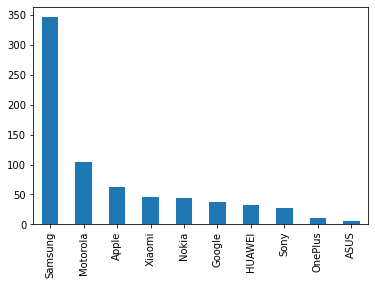

In [14]:
dfprod['brand'].value_counts().plot(kind = 'bar')

### 4.5 Display average rating per brand

<AxesSubplot:xlabel='brand'>

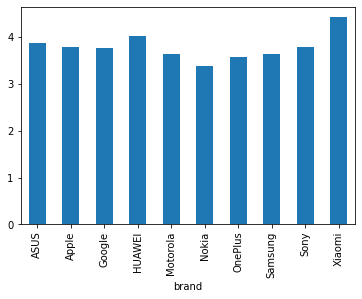

In [15]:
dfprod.groupby('brand').mean()['rating'].plot(kind ='bar')

### 4.6 Display average price per brand

<AxesSubplot:xlabel='brand'>

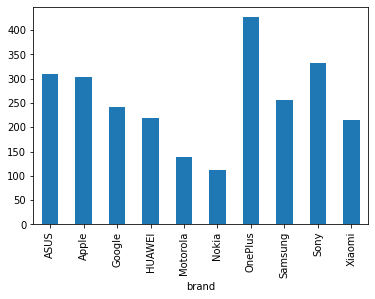

In [16]:
dfprod.groupby('brand').mean()['price'].plot(kind ='bar')

### 4.7 Display average 'totalReviews' per brand

<AxesSubplot:xlabel='brand'>

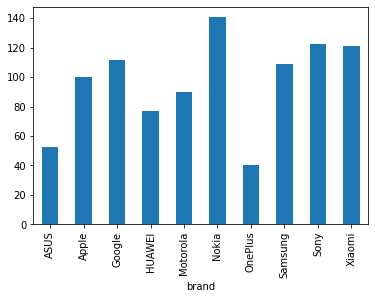

In [17]:
dfprod.groupby('brand').mean()['totalReviews'].plot(kind = 'bar')

### 4.8 Merge two datasets using 'asin' and check the shape of the final dataset

In [18]:
df= pd.merge(df_reviews,dfprod,how='inner',on ='asin')
df.shape

(67986, 14)

### 4.9 Rename important features with appropriate names.
Imortant features - "rating_x": "user_rating", "title_x": "review_title", "title_y": "item_title", "rating_y": "overall_rating"

In [19]:
df.columns

Index(['asin', 'name', 'rating_x', 'date', 'verified', 'title_x', 'body',
       'helpfulVotes', 'brand', 'title_y', 'rating_y', 'totalReviews', 'price',
       'originalPrice'],
      dtype='object')

In [20]:
df.rename(columns ={"rating_x": "user_rating", "title_x": "review_title", "title_y": "item_title", "rating_y": "overall_rating"},inplace = True) 

In [21]:
df.columns

Index(['asin', 'name', 'user_rating', 'date', 'verified', 'review_title',
       'body', 'helpfulVotes', 'brand', 'item_title', 'overall_rating',
       'totalReviews', 'price', 'originalPrice'],
      dtype='object')

### 4.10 Select rows having verified reviews and check the shape of the final dataset

In [22]:
df['verified'].value_counts()

True     61225
False     6761
Name: verified, dtype: int64

In [23]:
dff = df[df['verified']== True]

In [24]:
dff.shape

(61225, 14)

### 4.11 Check the number of reviews for various brands and report the brand that have highest number of reviews

<AxesSubplot:>

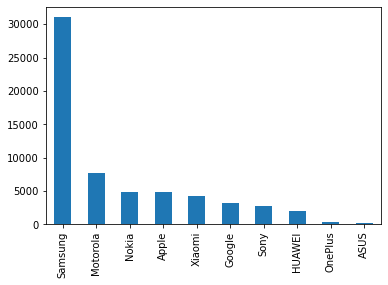

In [25]:
dff['brand'].value_counts().plot(kind ='bar')

### 4.12 Drop irrelevant columns and keep important features like 'brand','body','price','user_rating','review_title' for further analysis

In [26]:
dff2 = dff[['brand','body','user_rating','review_title' ]]
dff2.head()

,brand,body,user_rating,review_title
14,Motorola,DON'T BUY OUT OF SERVICE,1,Stupid phone
17,Motorola,1 star because the phones locked so I have to ...,1,Phones locked
18,Motorola,The product has been very good. I had used thi...,5,Excellent product
21,Motorola,I bought this phone to replace an LG phone tha...,4,"Nice, but"
22,Motorola,I purchased this phone for my AT&T phone repla...,1,It seems it doesn't work with the existing AT&...


In [27]:
dff2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61225 entries, 14 to 67984
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         61078 non-null  object
 1   body          61207 non-null  object
 2   user_rating   61225 non-null  int64 
 3   review_title  61211 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


### 4.13 Perform univariate analysis. Check distribution of price, user_rating

Dropping price because it has junk values and lots of 0 values ,so rather than performing analysis on it, we are dropping the same. 

5    35001
1    10910
4     7938
3     4128
2     3248
Name: user_rating, dtype: int64


<AxesSubplot:>

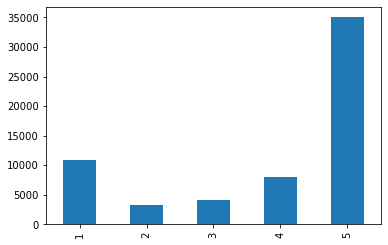

In [28]:
print(dff2['user_rating'].value_counts())
dff2['user_rating'].value_counts().plot(kind ='bar')

### 4.14 Create a new column called "sentiment". It should have value as 1 (positive) if the user_Rating is greater than 3, value as 0 (neutral) if the user_Rating == 3, and -1 (negative) is the user_Rating is less than 3.

In [29]:
dff2['sentiments']= dff2['user_rating'].apply(lambda x : 1 if x> 3 else (0 if x == 3 else (-1)))
print(dff2['sentiments'].value_counts())
dff2.sample(5)

 1    42939
-1    14158
 0     4128
Name: sentiments, dtype: int64


,brand,body,user_rating,review_title,sentiments
41364,Samsung,Love this phone.,5,Great phone!!!,1
31457,Apple,Kids love them,5,Connect to the world,1
48429,HUAWEI,I really liked this phone. I was using it with...,3,I really liked this phone,0
37091,Google,"On the 91st day of owning this phone, when it ...",1,Buyer beware!,-1
65852,Motorola,"Working great, unlocked,",5,Great product,1


if X >3 :
    y =1 
    elif x == 3:
        y=0
        else:
            y = -1

### 4.15 Check frequency distribution of the 'sentiment'

<AxesSubplot:>

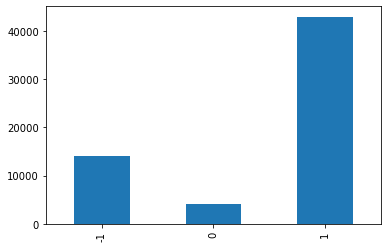

In [30]:
dff2['sentiments'].value_counts().plot(kind = 'bar')

### 4.16 Perform bivariate analysis. Check correlation/crosstab between features and write your inferences.

In [31]:
pd.crosstab(dff2['sentiments'],dff2['brand']).T

sentiments,-1,0,1
brand,,,
ASUS,49,20,137
Apple,1320,307,3249
Google,804,207,2152
HUAWEI,261,105,1653
Motorola,1667,553,5494
Nokia,1437,467,2974
OnePlus,34,11,259
Samsung,7469,2030,21521
Sony,663,216,1812


## 5. Text Preprocessing and Vectorization

We will analyze the 'body' and 'review_title' to gain more understanding.

We will ppeform the below tasks

- Convert the text into lowercase
- Remove punctuation
- Remove stopwords (English, from nltk corpus)
- Remove other keywords like "phone" and brand name

### 5.1 Change the datatype of the 'body' column to 'str' and convert it into lowercase. Print any two samples and check the output.

In [32]:
dff2['body']= dff2['body'].astype(str).apply(lambda x:x.lower())

In [33]:
dff2.sample(2)

,brand,body,user_rating,review_title,sentiments
40897,Samsung,so i received the note 8 and i loved using it ...,2,"Had to Return, Defective Unit",-1
13709,Nokia,good worked but didn't get any of the apps i n...,3,Three Stars,0


### 5.2 Remove punctuations from the lowercased 'body' column and display at least two samples.

In [34]:
dff2['body']= dff2['body'].replace('[^\w\s]','',regex = True)

In [35]:
dff2.sample(5)

,brand,body,user_rating,review_title,sentiments
47548,Motorola,purchased this because i have the moto g5 whic...,1,Bluetooth car pairing failed Android 9.0 maybe...,-1
66325,Motorola,works great easy to use,5,Works great & easy to use,1
11790,Samsung,im not just another one of those angry 1star i...,1,A word of advice and my story: Please read.,-1
59170,Samsung,the a30 has done everything i wanted it to do ...,4,Dependable,1
11404,Nokia,excelente,5,Five Stars,1


### 5.3 Remove stop words from the above pre-processed 'body' column and display at least two samples.

In [36]:
import nltk

In [37]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [38]:
from nltk.corpus import stopwords

In [39]:
stop = set (stopwords.words('english'))

In [40]:
stop

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [41]:
type(stop)

set

In [42]:
dff2['body'] = dff2['body'].apply(lambda words : " ".join(word for word in words.split()if word not in stop))

In [43]:
words = 'as advertised daughter loves it great price'

In [44]:
words.split()

['as', 'advertised', 'daughter', 'loves', 'it', 'great', 'price']

In [45]:
dff2['body'].head()

14                                     dont buy service
17      1 star phones locked pay additional fees unlock
18    product good used cell phone one projects work...
21    bought phone replace lg phone didnt like expec...
22    purchased phone att phone replacement even tho...
Name: body, dtype: object

### 5.4 Apply lemmatisation on the above preprocessed text and display a few samples

In [46]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [47]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()

In [48]:
lemmatizer = nltk.stem.WordNetLemmatizer()

In [49]:
def lemmatize_text (text):
    out_text = [lemmatizer.lemmatize(word) for word in w_tokenizer.tokenize(text)]
    return out_text

In [50]:
dff2['keywords'] = dff2['body'].apply(lemmatize_text)
dff2['keywords'] = [','.join(map(str, l)) for l in dff2['keywords']]


##### In second line of code for cell 50 we changed the list values in keywords column to string as tf-idf doesnot exceute on lists format. 

In [51]:
dff2.head()

,brand,body,user_rating,review_title,sentiments,keywords
14,Motorola,dont buy service,1,Stupid phone,-1,"dont,buy,service"
17,Motorola,1 star phones locked pay additional fees unlock,1,Phones locked,-1,"1,star,phone,locked,pay,additional,fee,unlock"
18,Motorola,product good used cell phone one projects work...,5,Excellent product,1,"product,good,used,cell,phone,one,project,worke..."
21,Motorola,bought phone replace lg phone didnt like expec...,4,"Nice, but",1,"bought,phone,replace,lg,phone,didnt,like,expec..."
22,Motorola,purchased phone att phone replacement even tho...,1,It seems it doesn't work with the existing AT&...,-1,"purchased,phone,att,phone,replacement,even,tho..."


### 5.5 Write a function to check word frequency of the text

In [52]:
top_N = 20
word_dist = nltk.FreqDist(dff2['body'])
print('All frequencies')
print('='*60)
wf=pd.DataFrame(word_dist.most_common(top_N),columns=['Word','Frequency'])

print(wf)
print ('='*60)

All frequencies
             Word  Frequency
0            good        737
1     great phone        409
2            love        373
3           great        248
4      love phone        225
5       excellent        221
6       excelente        198
7      good phone        176
8         perfect        169
9              ok        144
10                       140
11           nice        136
12    works great        118
13     nice phone        109
14           like        102
15   good product        100
16  great product         95
17      muy bueno         73
18       excelent         65
19        awesome         64


Another way

In [53]:
# Python code to find frequency of each word 
def freq(str): 
  
    # break the string into list of words  
    str = str.split()          
    str2 = [] 
  
    # loop till string values present in list str 
    for i in str:              
  
        # checking for the duplicacy 
        if i not in str2: 
  
            # insert value in str2 
            str2.append(i)  
              
    for i in range(0, len(str2)): 
  
        # count the frequency of each word(present  
        # in str2) in str and print 
        print('Frequency of', str2[i], 'is :', str.count(str2[i])) 

### 5.6 Check word frequency of review having top ratings (sentiment = 1) and display output of few samples

In [54]:
top_N = 20
word_dist = nltk.FreqDist(dff2[dff2['sentiments']==1]['body'])
print('All frequencies')
print('='*60)
wf=pd.DataFrame(word_dist.most_common(top_N),columns=['Word','Frequency'])
print(wf)
print ('='*60)

All frequencies
             Word  Frequency
0            good        683
1     great phone        408
2            love        369
3           great        247
4      love phone        225
5       excellent        221
6       excelente        198
7      good phone        171
8         perfect        169
9            nice        129
10                       125
11             ok        120
12    works great        118
13     nice phone        107
14           like        101
15   good product         98
16  great product         93
17      muy bueno         73
18       excelent         65
19        awesome         63


In [55]:
  
def main(): 
    str ='product good used cell phone one projects work...'
    freq(str)                     
  
if __name__=="__main__": 
    main()   

Frequency of product is : 1
Frequency of good is : 1
Frequency of used is : 1
Frequency of cell is : 1
Frequency of phone is : 1
Frequency of one is : 1
Frequency of projects is : 1
Frequency of work... is : 1


In [56]:
  
def main(): 
    str ='bought phone replace lg phone didnt like expec...'
    freq(str)                     
  
if __name__=="__main__": 
    main()   

Frequency of bought is : 1
Frequency of phone is : 2
Frequency of replace is : 1
Frequency of lg is : 1
Frequency of didnt is : 1
Frequency of like is : 1
Frequency of expec... is : 1


### 5.7 Initialize tf-idf vectorizer and transform the preprocessed body text

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [58]:
tfidf_vec = TfidfVectorizer()

### 5.8 Segregate the data into dependent (sentiment) and independent (transformed body using tf-idf) features for building a classifier. 

In [59]:
tfidf_trans = tfidf_vec.fit_transform(dff2['keywords'])

In [60]:
y = dff2['sentiments']

### 5.9 Split the data into Train & Test Sets

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
x_train,x_test,y_train,y_test = train_test_split(tfidf_trans,y)

## 6. Model building

### 6.1 Build a random forest classifier to predict the 'sentiment'
### 6.2 Predict on test set
### 6.3 Check accuracy and confusion matrix

In [63]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [64]:
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [65]:
y_predict = rf.predict(x_test)

In [66]:
y_predict

array([-1,  1,  1, ...,  1,  1,  1], dtype=int64)

In [67]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [68]:
print("Accuracy : ", accuracy_score(y_test, y_predict))
print("Confusion Matrix : \n",confusion_matrix(y_test, y_predict))
print("Classification Report: \n",classification_report(y_test, y_predict))

Accuracy :  0.8505912327693212
Confusion Matrix : 
 [[ 2550    12   990]
 [  310    82   670]
 [  302     3 10388]]
Classification Report: 
               precision    recall  f1-score   support

          -1       0.81      0.72      0.76      3552
           0       0.85      0.08      0.14      1062
           1       0.86      0.97      0.91     10693

    accuracy                           0.85     15307
   macro avg       0.84      0.59      0.60     15307
weighted avg       0.85      0.85      0.82     15307



In [69]:
labels = np.unique(y_test)
a =  confusion_matrix(y_test, y_predict, labels=labels)

pd.DataFrame(a, index=labels, columns=labels)

,-1,0,1
-1,2550,12,990
0,310,82,670
1,302,3,10388


## 7. Write your conclusion

##### There were total of 3552 products that were rated lower than 3 star on sentiment ratings
##### There were total of 1062 products which were rated with neutral sentiment ratings of 3 star
##### There were total of 10,693 products which were rated higher than 3 start sentiment ratings
##### The most commonly used word for higher ratings is 'good ' followed by phrase 'great phone'where as 'awesome ' is the least used word for describing higher ratings.

## Perfomance of our classifier



#### 2550 ratings less than 3 stars are predicted correctly

#### 310 ratings of 3 stars are misclassified as lower star ratings


####  302 ratings of more than 3 stars are misclassified as lower star ratings.


#### 12 ratings less than 3 star are misclassified as 3 star ratings


#### 82 ratings of 3 stars are predicted correctly


#### 3 ratings of more than 3 stars are misclassified as 3 star rating


#### 990 ratings less than 3 star are misclassified as higher ratings


#### 670 3 star ratings are misclassified as higher ratings


####  10388 ratings higher than 3 star are predicted correctly.


